In [99]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import statsmodels.api as sm

1. Create a histogram for total pollution levels in 1990 with provinces in the x axis and total pollution levels in the y axis.

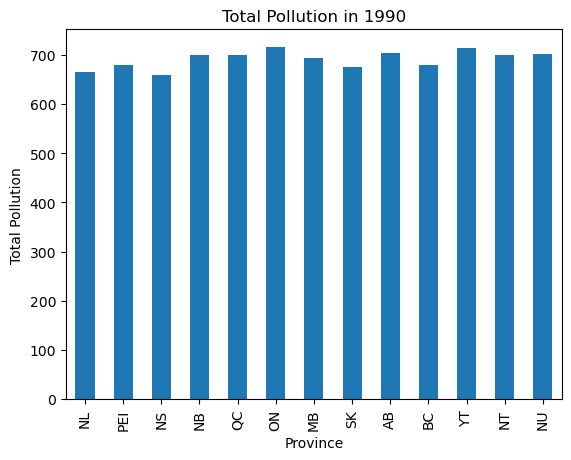

In [100]:
df_pol = pd.read_csv('../data/pollution.csv')
df_temp = pd.read_csv('../data/temperature.csv')

df = df_pol.copy()

#Filter
df = df[df['Year'] == 1990]
df = df.drop(columns=['Year'])
df.set_index('Province', inplace=True)
# Sum all pollution values
df['Total Pollution'] = df.sum(axis=1)

# Plot histogram with total pollution
df['Total Pollution'].plot(kind='bar')
plt.ylabel('Total Pollution')
plt.title('Total Pollution in 1990')
plt.show()

2. Create a histogram for total pollution and temperature levels in 1990 with provinces in the x axis and total pollution levels and temperature in the y axis. The x axis should contain full provincial names.

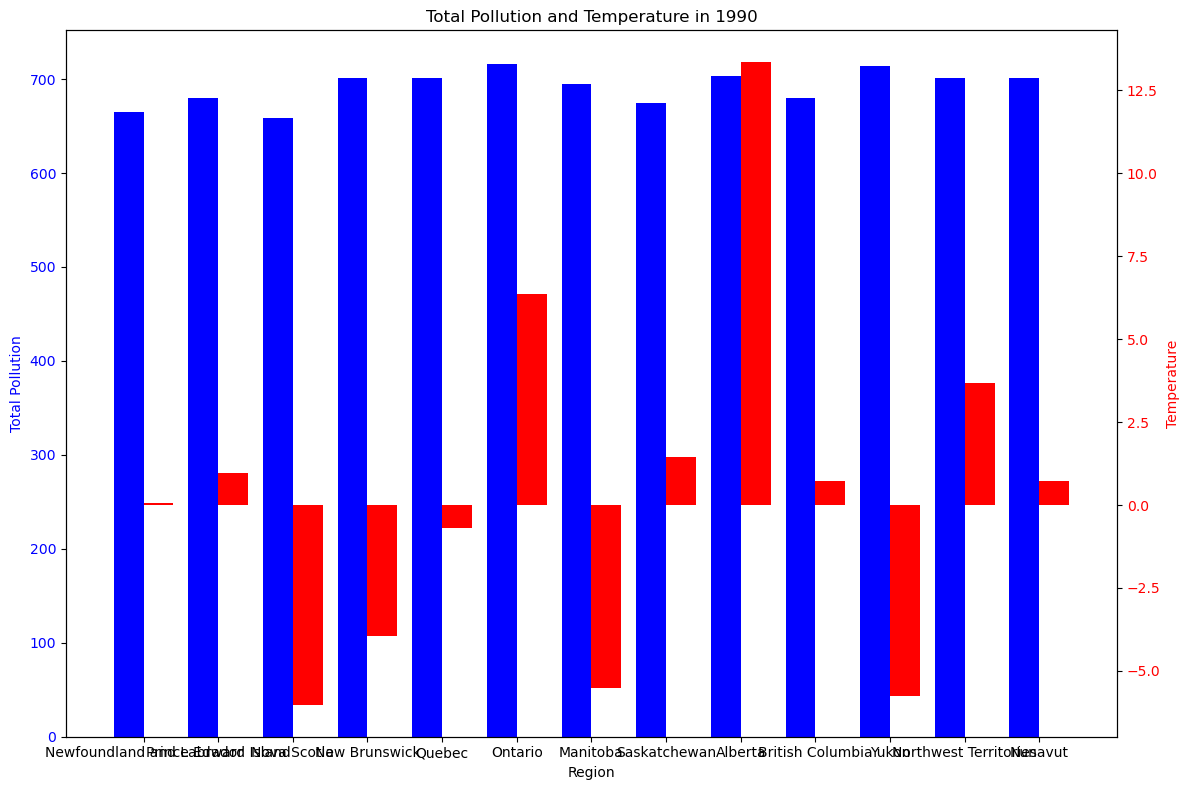

In [101]:
# Read province names
df_names = pd.read_csv('../data/province_names.csv')
# Map province names to pollution data
df_names = df_names.merge(df_pol, left_on='Shortnam', right_on='Province', how='right')
# Sum all pollution values
df_names['Total Pollution'] = df_names.iloc[:, 4:].sum(axis=1)
# Merge with temperature data
df_names = df_names.merge(df_temp, on=['Province', 'Year'], how='inner')
df_names = df_names.drop(columns=['Shortnam', 'Province'])

# Filter data for 1990
df_h = df_names[df_names['Year'] == 1990]
df_h = df_h.drop(columns=['Year'])

df_h.set_index('Region', inplace=True)
positions = np.arange(len(df_h.index))
bar_width = 0.4
# Create a figure and axis
fig, ax1 = plt.subplots(figsize=(12, 8))

# Plot Total Pollution on the primary y-axis
ax1.bar(positions - bar_width/2, df_h['Total Pollution'], bar_width, label='Total Pollution', color='b')
ax1.set_xlabel('Region')
ax1.set_ylabel('Total Pollution', color='b')
ax1.tick_params(axis='y', labelcolor='b')

# Create a secondary y-axis for temperature
ax2 = ax1.twinx()
ax2.bar(positions + bar_width/2, df_h['temperature'], bar_width, label='Temperature', color='r')
ax2.set_ylabel('Temperature', color='r')
ax2.tick_params(axis='y', labelcolor='r')

# Set x-ticks and labels
plt.xticks(positions, df_h.index, rotation=90)

# Add title and legend
plt.title('Total Pollution and Temperature in 1990')
fig.tight_layout()  # Adjust layout to make room for the labels

# Show the plot
plt.show()

3. Plot a line chart of changes in pollution over time by province for the provinces with the highest and lowest pollution levels in 1990.

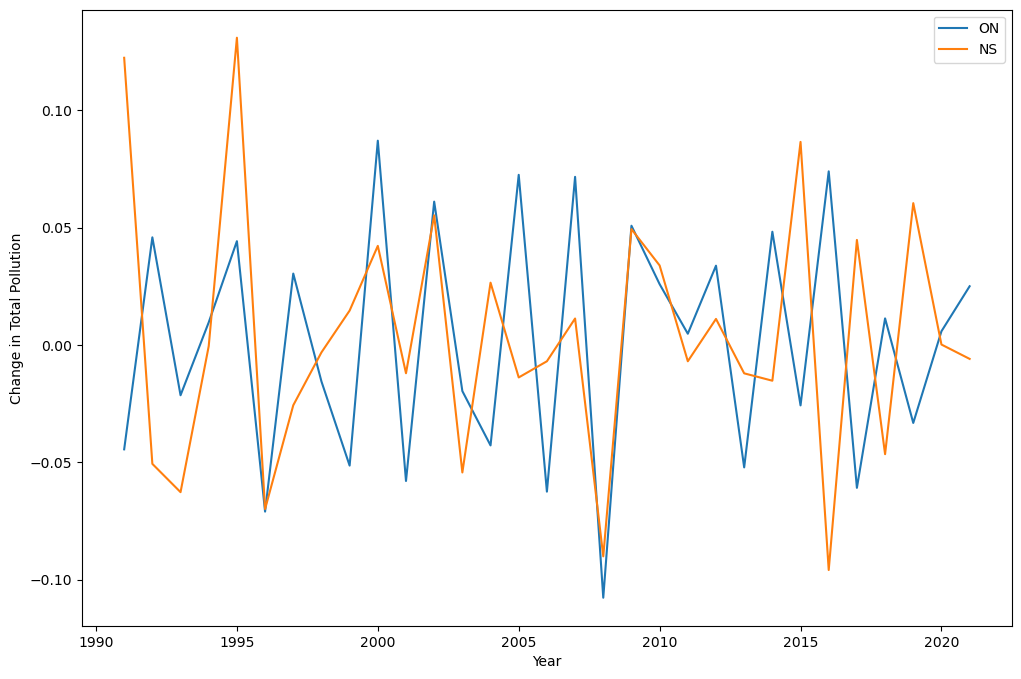

In [102]:
df_time = df_pol.copy()
df_time['Total Pollution'] = df_time.iloc[:, 2:].sum(axis=1)
df_time.set_index('Province', inplace=True)
df_time = df_time[['Year', 'Total Pollution']]

# Identify the province with the highest and lowest pollution in 1990
temp = df_time[df_time['Year'] == 1990]
max = temp['Total Pollution'].idxmax()
min = temp['Total Pollution'].idxmin()
filter = [max, min]

# Filter data for the provinces with the highest and lowest pollution
df_time = df_time[df_time.index.isin(filter)]
# Calculate the change in pollution
df_time['change'] = df_time.groupby('Province')['Total Pollution'].pct_change()
df_time = df_time.dropna()
# Prepare dfs for plotting
max = df_time[df_time.index == max]
min = df_time[df_time.index == min]

# Plot the change in pollution for the provinces with the highest and lowest pollution
plt.figure(figsize=(12, 8))
plt.plot(max['Year'], max['change'], label=max.index[0])
plt.plot(min['Year'], min['change'], label=min.index[0])
plt.legend()
plt.xlabel('Year')
plt.ylabel('Change in Total Pollution')
plt.show()

4. Create a table with the average pollution levels for each industry by province. Provinces should be in rows and industries in columns. Province names should be full names. The table should also include the average temperature over time. Identify the industry with the highest average pollution level and the province with the highest temperature.

In [103]:
df_pivot = df_pol.copy()
df_pivot = df_pivot.merge(df_temp, on=['Province', 'Year'], how='inner')
# Calculate the mean pollution and temperature for each province
df_pivot = df_pivot.groupby('Province').mean()
df_pivot = df_pivot.drop(columns=['Year'])
df_names = pd.read_csv('../data/province_names.csv')
df_pivot = df_pivot.merge(df_names, left_on='Province', right_on='Shortnam', how='left')
df_pivot.set_index('Region', inplace=True)
df_pivot = df_pivot.drop(columns=['Shortnam'])

# Calculate the total pollution for each industry
df_pivot.loc['Total'] = df_pivot.sum()
print(df_pivot.loc['Total'].idxmax())

print(df_pivot['temperature'].idxmax())

Buildings
Manitoba


5. Do a linear regression of total pollution levels on temperature levels. Plot the regression line on a scatter plot of total pollution levels and temperature levels.

                            OLS Regression Results                            
Dep. Variable:        Total Pollution   R-squared:                       0.007
Model:                            OLS   Adj. R-squared:                  0.005
Method:                 Least Squares   F-statistic:                     3.040
Date:                Mon, 05 Aug 2024   Prob (F-statistic):             0.0820
Time:                        17:11:02   Log-Likelihood:                -1941.8
No. Observations:                 416   AIC:                             3888.
Df Residuals:                     414   BIC:                             3896.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const         700.3713      1.267    552.929      

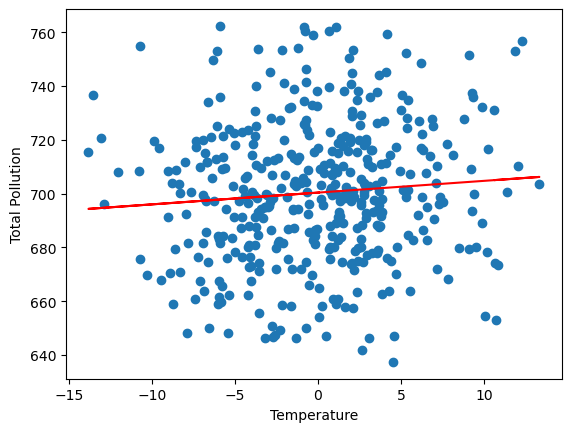

In [104]:
df_reg = df_pol.copy()
df_reg['Total Pollution'] = df_reg.iloc[:, 2:].sum(axis=1)
df_reg = df_reg.merge(df_temp, on=['Province', 'Year'], how='inner')
df_reg = df_reg[['Total Pollution', 'temperature']]

# Fit a linear regression model
model = sm.OLS(df_reg['Total Pollution'], sm.add_constant(df_reg['temperature'])).fit()
print(model.summary())

# Plot the regression line
plt.scatter(df_reg['temperature'], df_reg['Total Pollution'])
plt.plot(df_reg['temperature'], model.predict(), color='red')
plt.xlabel('Temperature')
plt.ylabel('Total Pollution')
plt.show()